# SIMPLE LINEAR REGRESSION

# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# STEP #1: LIBRARIES IMPORT


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #2: IMPORT DATASET

In [27]:
IceCream = pd.read_csv("IceCreamData.csv")

In [28]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [29]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [30]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [31]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

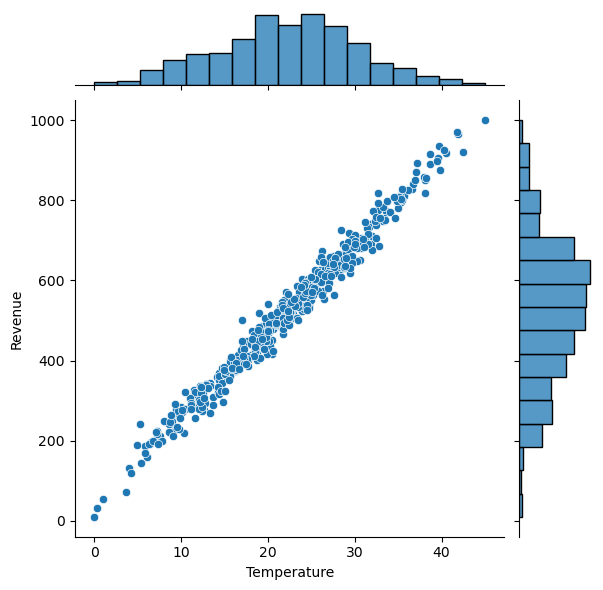

In [32]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

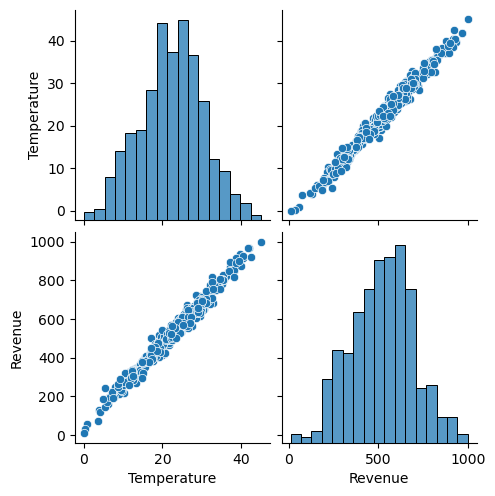

In [33]:
sns.pairplot(IceCream)

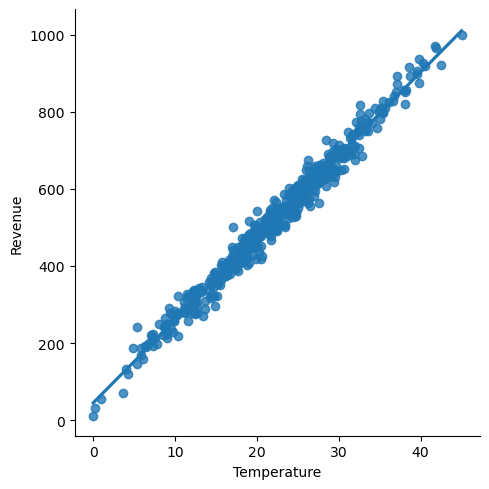

In [34]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [35]:
y = IceCream['Revenue']

In [36]:
X = IceCream[['Temperature']]

In [37]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [40]:
X_train.shape

(375, 1)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regressor = LinearRegression(fit_intercept = True)

In [43]:
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.49704443]
Linear Model Coefficient (b):  44.23902151059275


# STEP#6: TEST THE MODEL 

In [45]:
y_predict = regressor.predict( X_test)
y_predict

array([510.29273119, 592.3410828 , 367.72489769, 465.96536189,
       525.72933423, 479.04728079, 540.55555535, 661.23163675,
       502.60743763, 696.25150898, 321.58901557, 511.84471354,
       687.41573337, 444.14317014, 628.65359359, 382.90240008,
       175.23980047, 694.46546101, 576.54617928, 664.54035456,
       477.47638018, 400.14071168, 546.95051203, 571.38625016,
       601.55357434, 486.14686566, 377.89812783, 309.77225599,
       725.01784949, 352.77565006, 393.75346362, 527.55273482,
       474.53212584, 456.87374157, 206.7808603 , 232.45755352,
       515.07845309, 510.80986087, 284.51475099, 284.74272694,
       555.03966519, 894.2302018 , 769.63977517, 644.68045281,
       158.99911592, 530.81892653, 565.39429083, 591.50726103,
       475.25875884, 357.04707689, 483.01586628, 448.63763848,
       330.8076458 , 485.17860223, 572.35442738, 747.54451034,
       590.74043695, 668.42158789, 764.70257284, 442.06829498,
       415.324896  , 647.15382406, 451.6622004 , 651.99

In [46]:
y_test

419    505.743867
119    596.236690
243    367.052376
372    506.222379
469    489.569090
          ...    
218    413.914067
273    625.846421
170    540.977511
481    691.855484
227    618.172091
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

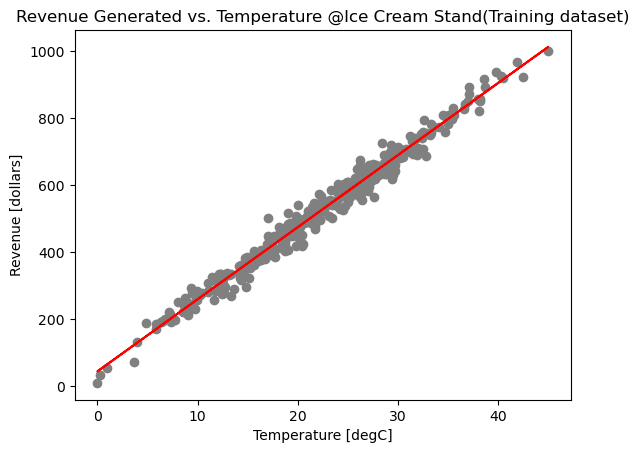

In [47]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

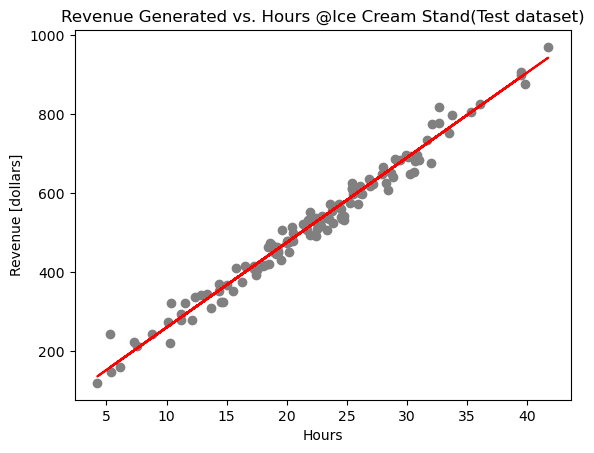

In [48]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [49]:
y_predict = regressor.predict(np.array([30]).reshape(-1, 1)) # or regressor.predict([[30]]) to change it to 2D matrix
y_predict

/Users/loandoan/Opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([689.15035439])

# GREAT JOB!